# Ridge Regression Analysis

This notebook demonstrates the implementation and analysis of Ridge Regression.

In [8]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import yaml

from src.model import RidgeRegression
from src.data_preparation import generate_sample_data, prepare_data

## Load Configuration

In [2]:
def load_config(config_path):
    """Load configuration from a YAML file."""
    with open(config_path, 'r') as file:
        return yaml.safe_load(file)

config = load_config('../configs/model_config.yaml')
print("Configuration loaded:")
print(config)

Configuration loaded:
{'random_state': 42, 'data': {'n_samples': 100, 'n_features': 5, 'noise': 0.1, 'test_size': 0.2}, 'model': {'alpha': 0.1}}


## Generate and Prepare Data

In [3]:
X, y = generate_sample_data(
    n_samples=config['data']['n_samples'],
    n_features=config['data']['n_features'],
    noise=config['data']['noise'],
    random_state=config['random_state']
)

X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_data(
    X, y,
    test_size=config['data']['test_size'],
    random_state=config['random_state']
)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Training set shape: (80, 5)
Test set shape: (20, 5)


## Train OLS Regression

In [10]:
# Train OLS model
ols = LinearRegression()
ols.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ols = ols.predict(X_test_scaled)

# Evaluate OLS model
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

print("OLS Results:")
print(f"Mean Squared Error: {mse_ols:.4f}")
print(f"R-squared Score: {r2_ols:.4f}")

# Extract coefficients and intercept
ols_coefficients = ols.coef_
ols_intercept = ols.intercept_

print("OLS Coefficients:")
for i, coef in enumerate(ols_coefficients):
    print(f"Feature {i+1}: {coef:.4f}")
print(f"Intercept: {ols_intercept:.4f}")

OLS Results:
Mean Squared Error: 0.0101
R-squared Score: 0.9993
OLS Coefficients:
Feature 1: 2.6281
Feature 2: 1.9793
Feature 3: 1.4624
Feature 4: -0.9355
Feature 5: 0.5771
Intercept: -0.3958


## Train Ridge Regression Model

In [4]:
ridge = RidgeRegression(alpha=config['model']['alpha'])
ridge.fit(X_train_scaled, y_train)

print("Model trained. Coefficients:")
print(ridge.coefficients)
print(f"Intercept: {ridge.intercept}")

Model trained. Coefficients:
[ 2.62437052  1.97667536  1.4609749  -0.93427064  0.57608268]
Intercept: -0.39575658819402165


## Make Predictions and Evaluate Model

In [5]:
y_pred = ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 0.0096
R-squared Score: 0.9994


## Visualize Results

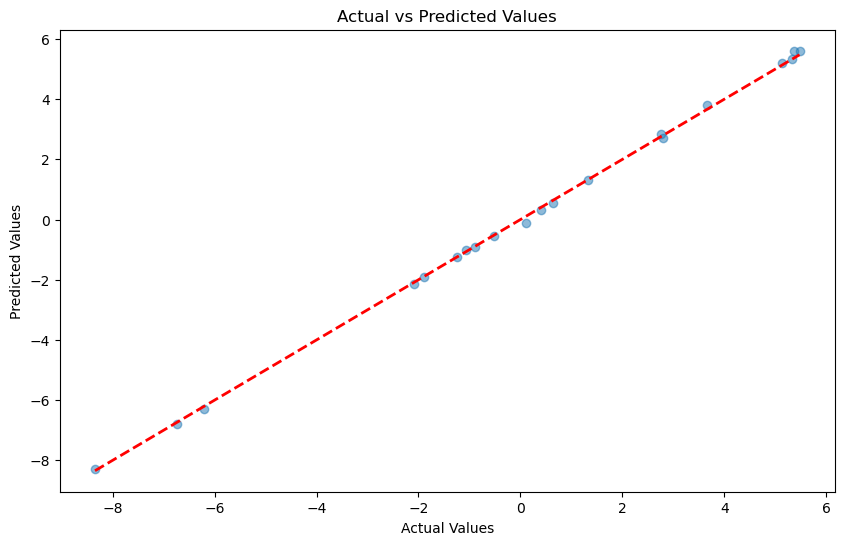

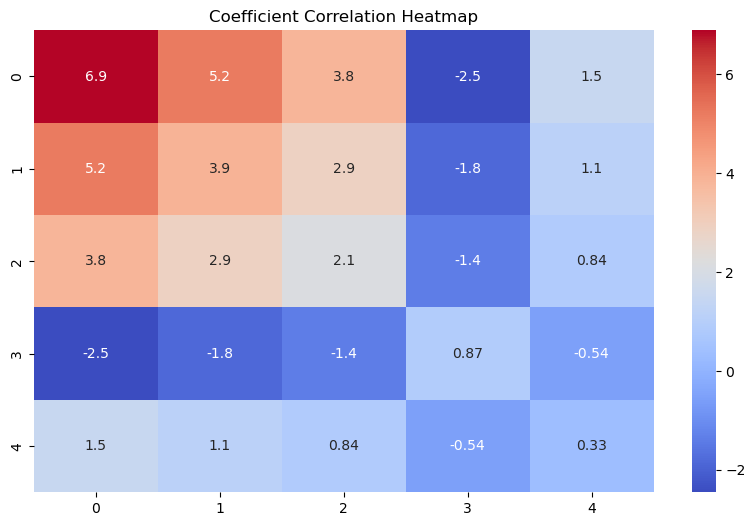

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(np.outer(ridge.coefficients, ridge.coefficients), annot=True, cmap='coolwarm')
plt.title('Coefficient Correlation Heatmap')
plt.show()